In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Mar 26 09:07:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    43W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Activation, BatchNormalization, MaxPool2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive/', force_remount = 'True')

Mounted at /content/gdrive/


In [4]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [5]:
%cd "Facial Expression Recognition"

/content/gdrive/MyDrive/Facial Expression Recognition


In [6]:
y_train = np.load('y_train.npy')
x_train = np.load('x_train.npy')
y_cv = np.load('y_cv.npy')
x_cv = np.load('x_cv.npy')

In [7]:
y_train

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [8]:
x_train.shape

(16200, 48, 48, 1)

In [9]:
train_gen = ImageDataGenerator(rotation_range = 20,
                               zoom_range = 0.2,
                               shear_range = 0.2,
                              #  width_shift_range = 0.1,
                              #  height_shift_range = 0.1,
                               horizontal_flip = True)

In [10]:
train = train_gen.flow(x_train, y_train, batch_size=64)

In [11]:
train

## Model

In [ ]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model2.ckpt',
                                        save_weights_only=True, verbose = 1)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),
    Flatten(),

    Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(6, activation = 'softmax')
])

In [ ]:
model.load_weights('model.ckpt')

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 100, callbacks = [cb], validation_data = (x_cv, y_cv))

Epoch 1/100
507/507 [==============================] - ETA: 0s - loss: 1.7782 - accuracy: 0.2132
Epoch 1: saving model to model2.ckpt
507/507 [==============================] - 4s 6ms/step - loss: 1.7782 - accuracy: 0.2132 - val_loss: 1.7633 - val_accuracy: 0.2300
Epoch 2/100
503/507 [============================>.] - ETA: 0s - loss: 1.6978 - accuracy: 0.2867
Epoch 2: saving model to model2.ckpt
507/507 [==============================] - 3s 5ms/step - loss: 1.6976 - accuracy: 0.2867 - val_loss: 1.6774 - val_accuracy: 0.3100
Epoch 3/100
500/507 [============================>.] - ETA: 0s - loss: 1.6023 - accuracy: 0.3471
Epoch 3: saving model to model2.ckpt
507/507 [==============================] - 3s 5ms/step - loss: 1.6026 - accuracy: 0.3473 - val_loss: 1.5577 - val_accuracy: 0.3828
Epoch 4/100
497/507 [============================>.] - ETA: 0s - loss: 1.5402 - accuracy: 0.3851
Epoch 4: saving model to model2.ckpt
507/507 [==============================] - 3s 5ms/step - loss: 1.5395 -

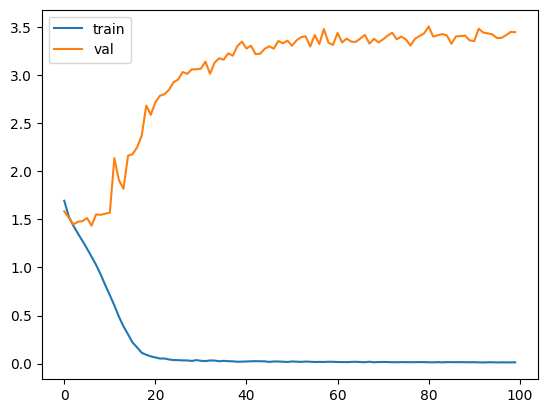

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
# model.ckpt
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),

#     Flatten(),

#     Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
#     Dense(6, activation = 'softmax')
# ])

In [ ]:
model.evaluate(x_train, y_train)

507/507 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9980


[0.011485913768410683, 0.9979629516601562]

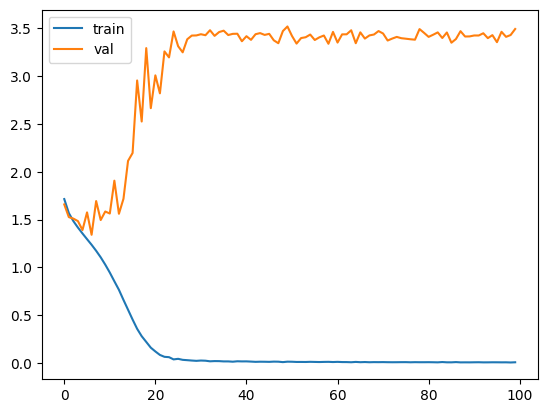

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
# model1.ckpt
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),

#     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),
#     Flatten(),

#     Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
#     Dense(6, activation = 'softmax')
# ])
# Base Model 1

In [ ]:
model.evaluate(x_train, y_train)

507/507 [==============================] - 1s 2ms/step - loss: 0.0076 - accuracy: 0.9983


[0.007575859781354666, 0.9982715845108032]

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),

#     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),

#     Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),
#     Flatten(),

#     Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
#     Dense(6, activation = 'softmax')
# ])
# Base Model 2

KeyError: ignored

In [ ]:
model.evaluate(x_train, y_train)

507/507 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9979


[0.006151641719043255, 0.9979012608528137]

### Addressing Overfitting

In [ ]:
# Using Base Model 1
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),
    Dropout(0.5),

    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),
    Dropout(0.5),

    Flatten(),

    Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dropout(0.5),
    Dense(6, activation = 'softmax')
])

In [ ]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model1.ckpt',
                                        save_weights_only=True, verbose = 1)

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 200, callbacks = [cb], validation_data = (x_cv, y_cv))

Epoch 1/200
498/507 [============================>.] - ETA: 0s - loss: 1.8026 - accuracy: 0.1906
Epoch 1: saving model to model1.ckpt
507/507 [==============================] - 4s 5ms/step - loss: 1.8021 - accuracy: 0.1906 - val_loss: 1.7770 - val_accuracy: 0.2639
Epoch 2/200
504/507 [============================>.] - ETA: 0s - loss: 1.7520 - accuracy: 0.2463
Epoch 2: saving model to model1.ckpt
507/507 [==============================] - 2s 5ms/step - loss: 1.7520 - accuracy: 0.2460 - val_loss: 1.7264 - val_accuracy: 0.2733
Epoch 3/200
499/507 [============================>.] - ETA: 0s - loss: 1.7098 - accuracy: 0.2791
Epoch 3: saving model to model1.ckpt
507/507 [==============================] - 2s 5ms/step - loss: 1.7092 - accuracy: 0.2796 - val_loss: 1.6779 - val_accuracy: 0.3050
Epoch 4/200
495/507 [============================>.] - ETA: 0s - loss: 1.6835 - accuracy: 0.2948
Epoch 4: saving model to model1.ckpt
507/507 [==============================] - 2s 5ms/step - loss: 1.6827 -

Text(0.5, 1.0, 'Model 1')

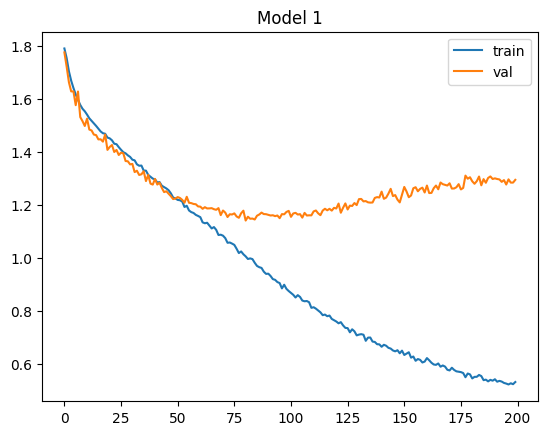

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 1')

Text(0.5, 1.0, 'Model 1')

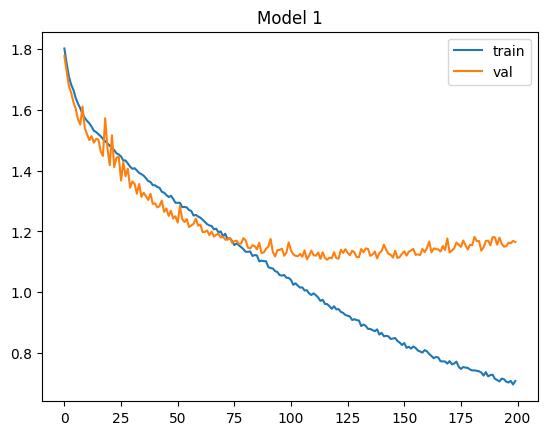

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 1')
# Best Model for overfitting
# dropout = 0.5
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),
#     Dropout(0.5),

#     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
#     MaxPool2D((2, 2)),
#     Dropout(0.5),

#     Flatten(),

#     Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
#     Dropout(0.5),
#     Dense(6, activation = 'softmax')
# ])

Text(0.5, 1.0, 'Model 1')

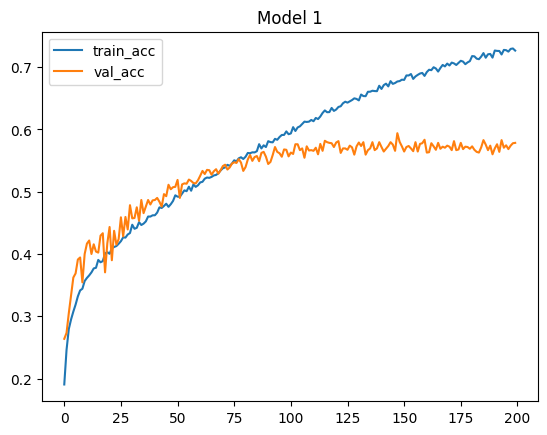

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.title('Model 1')

In [ ]:
# Using Base Model 2
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),
    Dropout(0.55),

    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),
    Dropout(0.55),
    
    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'),
    MaxPool2D((2, 2)),
    Dropout(0.55),

    Flatten(),

    Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dropout(0.55),
    Dense(6, activation = 'softmax')
])

In [ ]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model2.ckpt',
                                        save_weights_only=True, verbose = 1)

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.load_weights('model2.ckpt')

In [ ]:
model.fit(x_train, y_train, epochs = 3000, callbacks = [cb], validation_data = (x_cv, y_cv))

Epoch 1/3000
507/507 [==============================] - ETA: 0s - loss: 0.9351 - accuracy: 0.6394
Epoch 1: saving model to model2.ckpt
507/507 [==============================] - 14s 6ms/step - loss: 0.9351 - accuracy: 0.6394 - val_loss: 1.0663 - val_accuracy: 0.6033
Epoch 2/3000
503/507 [============================>.] - ETA: 0s - loss: 0.9434 - accuracy: 0.6414
Epoch 2: saving model to model2.ckpt
507/507 [==============================] - 3s 5ms/step - loss: 0.9442 - accuracy: 0.6411 - val_loss: 1.0482 - val_accuracy: 0.6011
Epoch 3/3000
502/507 [============================>.] - ETA: 0s - loss: 0.9372 - accuracy: 0.6403
Epoch 3: saving model to model2.ckpt
507/507 [==============================] - 3s 5ms/step - loss: 0.9363 - accuracy: 0.6407 - val_loss: 1.0566 - val_accuracy: 0.5944
Epoch 4/3000
504/507 [============================>.] - ETA: 0s - loss: 0.9362 - accuracy: 0.6466
Epoch 4: saving model to model2.ckpt
507/507 [==============================] - 3s 5ms/step - loss: 0.9

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Model 2')

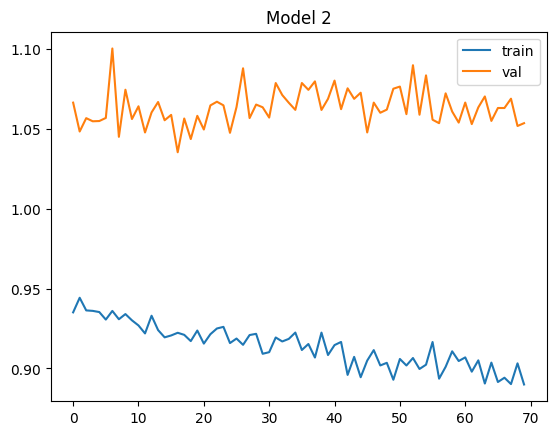

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 2')

Text(0.5, 1.0, 'Model 2.1')

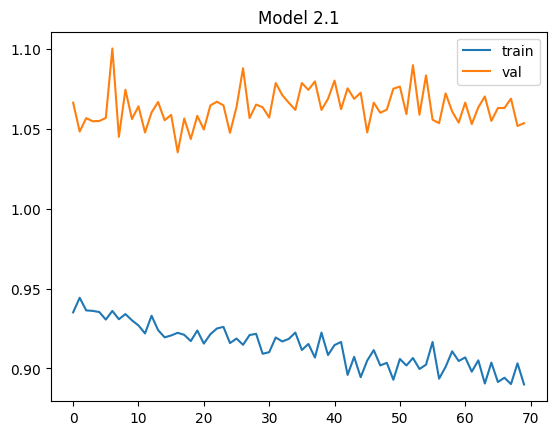

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 2.1')

Text(0.5, 1.0, 'Model 2')

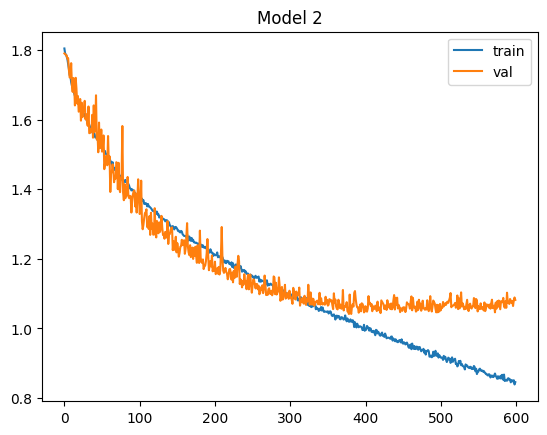

In [ ]:
plt.plot(train_loss+model.history.history['loss'])
plt.plot(val_loss+model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 2')

Text(0.5, 1.0, 'Model 2')

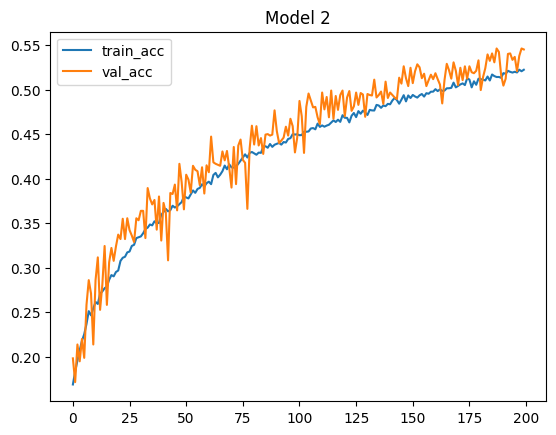

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.title('Model 2')

Text(0.5, 1.0, 'Model 2')

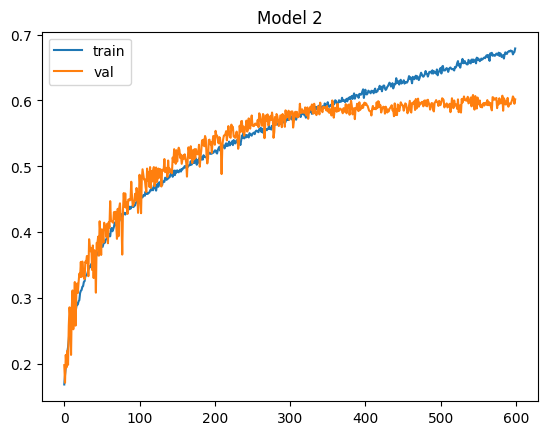

In [ ]:
plt.plot(train_acc+model.history.history['accuracy'])
plt.plot(val_acc+model.history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.title('Model 2')

In [ ]:
np.save('train_loss', np.array(train_loss+model.history.history['loss']))
np.save('train_acc', np.array(train_acc+model.history.history['accuracy']))
np.save('val_loss', np.array(val_loss+model.history.history['val_loss']))
np.save('val_acc', np.array(val_acc+model.history.history['val_accuracy']))


In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']


In [ ]:
model.save('model.h5')

In [52]:
# Using Base Model 3
model = Sequential([
    Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # BatchNormalization(),
    Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    
    Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # BatchNormalization(),
    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    
    Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # BatchNormalization(),
    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # BatchNormalization(),
    Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.35),
    
    
    Flatten(),

    Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
    BatchNormalization(),
    Dropout(0.45),
    Dense(6, activation = 'softmax')
])

In [56]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model7.ckpt',
                                        save_weights_only=True, verbose = 1)

In [54]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_63 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 conv2d_64 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 24, 24, 32)       

In [32]:
model.load_weights('model5.ckpt')

In [ ]:
model.fit(x_train, y_train, epochs = 5000, callbacks = [cb], validation_data = (x_cv, y_cv))

Epoch 1/5000
505/507 [============================>.] - ETA: 0s - loss: 2.1323 - accuracy: 0.1946
Epoch 1: saving model to model7.ckpt
507/507 [==============================] - 9s 12ms/step - loss: 2.1315 - accuracy: 0.1948 - val_loss: 1.7357 - val_accuracy: 0.2561
Epoch 2/5000
507/507 [==============================] - ETA: 0s - loss: 1.8391 - accuracy: 0.2222
Epoch 2: saving model to model7.ckpt
507/507 [==============================] - 5s 11ms/step - loss: 1.8391 - accuracy: 0.2222 - val_loss: 1.7939 - val_accuracy: 0.2600
Epoch 3/5000
502/507 [============================>.] - ETA: 0s - loss: 1.7644 - accuracy: 0.2469
Epoch 3: saving model to model7.ckpt
507/507 [==============================] - 5s 11ms/step - loss: 1.7638 - accuracy: 0.2474 - val_loss: 1.6929 - val_accuracy: 0.2861
Epoch 4/5000
503/507 [============================>.] - ETA: 0s - loss: 1.7231 - accuracy: 0.2665
Epoch 4: saving model to model7.ckpt
507/507 [==============================] - 5s 11ms/step - loss: 

In [33]:
model.evaluate(x_train, y_train)

507/507 [==============================] - 2s 3ms/step - loss: 0.6823 - accuracy: 0.7620


[0.6822583079338074, 0.7620370388031006]

In [34]:
model.evaluate(x_cv, y_cv)

57/57 [==============================] - 0s 3ms/step - loss: 0.9624 - accuracy: 0.6406


[0.962375283241272, 0.6405555605888367]

In [37]:
model.save('low_err_model.h5')

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)       

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 15.8 MB/s eta 0:00:00


In [ ]:
import visualkeras

ModuleNotFoundError: ignored

In [ ]:
visualkeras.layered_view(model, legend = True)

NameError: ignored

In [ ]:
model = tf.keras.models.load_model('best_model.h5')

In [35]:
y_test = np.load('y_test.npy')
x_test = np.load('x_test.npy')


In [36]:
model.evaluate(x_test, y_test)

221/221 [==============================] - 1s 4ms/step - loss: 0.9807 - accuracy: 0.6232


[0.9807348847389221, 0.6231781244277954]

In [ ]:
y_test

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

Text(0.5, 1.0, 'Model 4')

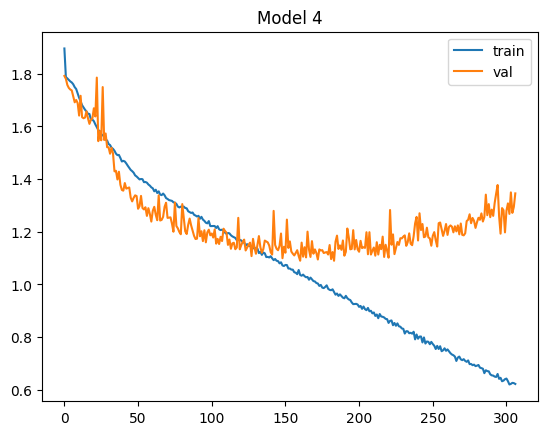

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 4')
# Using model3.ckpt
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape = (48, 48, 1), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
#     Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
#     MaxPool2D((2, 2)),
    # Dropout(0.2),

    # Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # MaxPool2D((2, 2)),
    # Dropout(0.25),
    
    # Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # MaxPool2D((2, 2)),
    # Dropout(0.3),

    # Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'),
    # MaxPool2D((2, 2)),
    # Dropout(0.35),

#     Flatten(),

#     Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'),
#    Dropout(0.4),
#     Dense(6, activation = 'softmax')
# ])

Text(0.5, 1.0, 'Model 4.3')

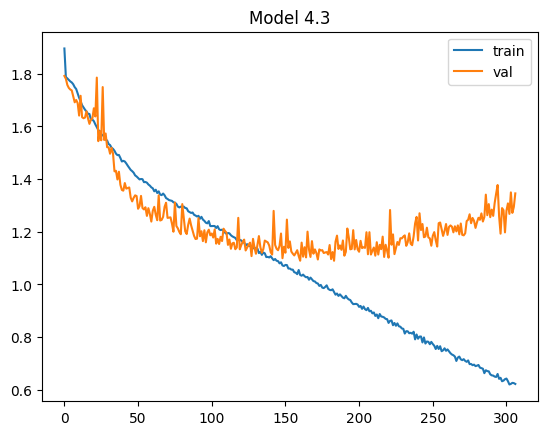

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'val'])
plt.title('Model 4.3')

Text(0.5, 1.0, 'Model 4.3')

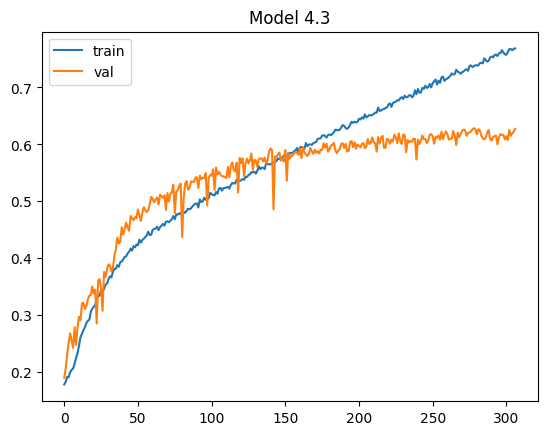

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.title('Model 4.3')

In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']